# Question 2

In [20]:
#Import Libraries

import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import operator
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf

In [21]:
#Import only "returns data" sheet

df = pd.read_excel('data.xlsx', sheet_name='returns data')
df.head()

,perf_date,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
0,2006-01-31,0.0088,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,0.022615,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.0,0.030207,-0.000626
1,2006-02-28,0.0083,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,0.023366,0.005920,-0.005564,0.016747,0.003766,-0.002498,0.0,-0.014214,-0.002882
2,2006-03-31,0.0242,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,-0.039254,0.004665,0.015684,0.005389,0.000358,-0.014418,0.0,0.008646,0.009902
3,2006-04-30,0.0146,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,-0.006414,-0.021774,0.026725,0.006107,0.008849,-0.013622,0.0,0.017130,0.008526
4,2006-05-31,-0.0325,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,-0.054605,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.0,0.001438,-0.001415


In [22]:
#Clean up of Column names
df.columns = df.columns.str.replace(' - ', '_').str.replace(' ', '_').str.strip()

#Insert column of 1's to use for linear regression, put in position 2 for neatness.
df['Constant'] = 1
df.insert(2, 'Constant', df.pop('Constant'))

df.describe()

#Clearly issues with the Factor_Value_vs_growth and Factor interest rates, checking the data we have 3 values greater than 10k for the Factor value growth and 
#3 values over 3000 in the Interest rates factor. I will set these value to equal the median value of the column.
df.loc[abs(df['Factor_Value_vs_Growth']) > 1000, 'Factor_Value_vs_Growth'] = -0.000972
df.loc[abs(df['Factor_Interest_Rates']) > 1000, 'Factor_Interest_Rates'] = 0.002805

df.describe()

,Hedge_Fund,Constant,Factor_Low_Risk,Factor_Value_vs_Growth,Factor_Fixed_Income_Carry,Factor_Local_Equity,Factor_Trend_Following,Factor_Commodities,Factor_Equity,Factor_Foreign_Exchange_Carry,Factor_Small_Cap,Factor_Emerging_Markets,Factor_Foreign_Currency,Factor_Local_Inflation,Factor_Equity_Short_Volatility,Factor_Credit,Factor_Interest_Rates,Factor_Crowding,Factor_Momentum,Factor_Quality
count,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,1.0,0.005162,-0.000240,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,0.002380,0.002219,0.005333,0.006526
std,0.029623,0.0,0.028541,0.026839,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,0.010219,0.009019,0.032067,0.015723
min,-0.096051,1.0,-0.128207,-0.126148,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.009950,1.0,-0.011406,-0.015122,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.008800,1.0,0.004758,-0.000972,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.001267,0.007850,0.007147
75%,0.028000,1.0,0.023451,0.010985,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.008842,0.007310,0.024615,0.014936
max,0.087900,1.0,0.076999,0.126823,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,0.035963,0.028112,0.124979,0.084840


# Question 2.1

In [24]:
#Setting of the independent and dependent variables
Y = df['Hedge_Fund']
X = df.drop(['Hedge_Fund','perf_date'], axis = 1)

#Simple Linear reression using OLS 
regr = sm.OLS(Y,X)
model = regr.fit()
p_values = model.pvalues

#Identify insignifcant coefficients using alpha = 0.05

sig_alpha = 0.05
significant_coefficients = model.params[p_values < sig_alpha]

# Print the significant coefficients
print("Significant coefficients:")
print(significant_coefficients)

Significant coefficients:
Constant                  0.008502
Factor_Value_vs_Growth   -0.605122
Factor_Credit             0.231162
dtype: float64


# Question 2.2

From Question 2.1 we have identified the coefficient which have a significant level < 0.05 (Less than 5% chance of being insignifcant from 0). The final output formula is as follows showing all significant figures:

$$HedgeFundReturn_t = 0.008502 -0.605122 * FactorValuevsGrowth_t + 0.231162 * FactorCredit_t$$

Given this fund is said to be a Long/Short Equity hedge fund it is not unexpected that the returns only follow 2 factors, those being the Credit factor and Value vs Growth. It is likely the hedge fund uses a value vs growth factor in deciding which equities to long/short.

In regards to the credit factor this would relate to the idea that the hedge fund maybe using the credit rating of equities as an indicator to if an equity is under/over valued given the qualitative valuation of a firms equities. 

| Coefficient            | Value    |
|------------------------|----------|
| Alpha(Constant)        | 0.008502 |
| Beta1(Value Vs Growth) | -0.60512 |
| Beta2(Credit)          | 0.231162 |

# Question 2.3

Given the returns of the fund are for 16 years, i will use the UK 20-year yield curve as the risk free rate = 4.3%

In [25]:
df =df.drop('Constant',axis=1)

In [26]:
#Calculation of the Sharpe Ratios by looping through all the Factors and calculating the mean, standard deviation and then the Sharpe Ratio
Risk_free = 0.043

#Stores all share ratios in dicionary
Strategy_Sharpes = {}
Strategy_Returns = {}

#Loop through all the columns in the dataframe (removed constant)
for strategy in df.columns[1:]:
    strategy_returns = df[strategy]
    strategy_average_return = np.mean(strategy_returns) * 12
    strategy_std_dev = np.std(strategy_returns)*np.sqrt(12)
    Strategy_Sharpe_Ratio = (strategy_average_return - Risk_free)/strategy_std_dev
    Strategy_Sharpes[strategy] = Strategy_Sharpe_Ratio
    Strategy_Returns[strategy] = strategy_average_return

#Sorts Sharpe Ratios/Returns into descending order and outputs the top 5, remove the [:5] and you can see all the factors.
Strategy_Sharpes = sorted(Strategy_Sharpes.items(), key=operator.itemgetter(1), reverse = True)[:5]
Strategy_Returns = sorted(Strategy_Returns.items(), key=operator.itemgetter(1), reverse = True)[:5]

print(f'Sharpe Ratios:{Strategy_Sharpes}\n')
print(f'Strategy Returns: {Strategy_Returns}')
    

Sharpe Ratios:[('Factor_Quality', 0.6500036166627848), ('Hedge_Fund', 0.5677375132159441), ('Factor_Trend_Following', 0.2644202693064085), ('Factor_Equity', 0.2229874581213647), ('Factor_Low_Risk', 0.1921639165059182)]

Strategy Returns: [('Hedge_Fund', 0.10110942583384613), ('Factor_Quality', 0.07831334955726439), ('Factor_Equity', 0.07440451639445189), ('Factor_Trend_Following', 0.06735804009341732), ('Factor_Momentum', 0.06399102116476009)]


# Question 2.4

Other metric to consider are the Value at Risk, expected shortfall and Expected Shortfall/Var ratio for guaging tail risk.
Assuming a confidence level of 5%.

In [27]:
Confidence_level = 0.05

#Dictionaries for all metrics
Strategy_VAR = {}
Strategy_ES = {}
Strategy_VARES_ratio = {}

#Loop through all the columns in the dataframe (removed constant)
for strategy in df.columns[1:]:
    strategy_returns = df[strategy]
    strategy_VAR = -np.percentile(strategy_returns,100*Confidence_level)
    strategy_ES = strategy_returns[strategy_returns <-strategy_VAR].mean()
    Strategy_VARES = strategy_ES/strategy_VAR
    Strategy_VAR[strategy] = strategy_VAR
    Strategy_ES[strategy] = strategy_ES
    Strategy_VARES_ratio[strategy] = Strategy_VARES

#sorts the top 5 factors/fund for each metric
Strategy_VAR = sorted(Strategy_VAR.items(), key=operator.itemgetter(1), reverse = True)[:5]
Strategy_ES = sorted(Strategy_ES.items(), key=operator.itemgetter(1), reverse = False)[:5]
Strategy_VARES_ratio = sorted(Strategy_VARES_ratio.items(), key=operator.itemgetter(1), reverse = True)[:5]

print(f'VaR:{Strategy_VAR}\n')
print(f'ES: {Strategy_ES}\n')
print(f'ES/VAR: {Strategy_VARES_ratio}')

VaR:[('Factor_Equity', 0.06911578340602073), ('Factor_Momentum', 0.051007976021758154), ('Factor_Credit', 0.04881816302087802), ('Factor_Low_Risk', 0.040958207948074185), ('Hedge_Fund', 0.04079)]

ES: [('Factor_Equity', -0.09505649136981074), ('Factor_Credit', -0.0803197449060471), ('Factor_Momentum', -0.07349755183364819), ('Factor_Low_Risk', -0.06501274358989374), ('Hedge_Fund', -0.05756718302)]

ES/VAR: [('Factor_Foreign_Currency', -1.1746870707319117), ('Factor_Equity_Short_Volatility', -1.2145194037098124), ('Factor_Trend_Following', -1.2965893105014064), ('Factor_Commodities', -1.3667660511940745), ('Factor_Interest_Rates', -1.3679293777623411)]


Conclusion on which strategy is the best to invest in is: Factor_Quality

Results are as follows:

| Metrics            | Hedge Fund | Factor_Quality |
|--------------------|------------|----------------|
| Sharpe Ratio       | 0.57       | 0.65           |
| Annual Returns     | 0.10       | 0.08           |
| VaR                | 0.04       | 0.02           |
| Expected Shortfall | -0.058     | -0.029         |
| ES/VAR ratio       | -1.41      | -1.40          |

From the above analysis it is clear that the best strategy in terms of Returns and Risk control is to invest solely in the Factor_Quality. The superior Sharpe Ratio and better tail risks in the form of Var and Expected Shortfall indicate a less tail end risk. If Fees associated with the Hedge fund were taken into account the Annual returns would be smaller than the factor quality and the Sharpe Ratio reduced even further. In this case Tyler is correct in that the more profitable strategy would be to invest directly in a factor.


# Question 2.5

There are multiple ways to test for stationarity in timeseries data. A few methods include visual analysis of plotting the grpahs and identifying if there are any trends in the data, but this method is not sufficient usually and merely is a way to estimate stationarity. In order for there to be stationarity, the mean and variance needs to be constant throughout the time series. There we can use two unit tests to check for this condition and these are the Dickey-Fuller test and the KPSS test.

In [31]:
#Running the Dickey-Fuller and KPSS test on the two betas from part 2.1.

Betas = ['Factor_Value_vs_Growth','Factor_Credit']

for beta in Betas:
    #Perform Augmented Dickey fuller test
    adf_result = adfuller(df[beta])
    adf_statistic = adf_result[0]
    adf_p_value = adf_result[1]

    print(f"{beta} ADF Test Results:")
    print(f"ADF Statistic: {adf_statistic}")
    print(f"p-value: {adf_p_value}\n")

    # Perform KPSS test
    kpss_result = kpss(df[beta])
    kpss_statistic = kpss_result[0]
    kpss_p_value = kpss_result[1]

    print(f"{beta} KPSS Test Results:")
    print(f"KPSS Statistic: {kpss_statistic}")
    print(f"p-value: {kpss_p_value}\n")

Factor_Value_vs_Growth ADF Test Results:
ADF Statistic: -12.04894904634683
p-value: 2.6246895119137247e-22

Factor_Value_vs_Growth KPSS Test Results:
KPSS Statistic: 0.1941502930933
p-value: 0.1

Factor_Credit ADF Test Results:
ADF Statistic: -5.363342746172026
p-value: 4.042422869505683e-06

Factor_Credit KPSS Test Results:
KPSS Statistic: 0.09824664721698181
p-value: 0.1



C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


For both betas the null hypothesis of the augmented dickeyfuller test says that the time series has no stationarity. However, the p-value for both betas are strictly less than 5%, therefore we reject the null hypothesis and can confirm stationarity.

Looking at the KPSS test which has a null hypothesis that the data is stationary, given our pvalues of 0.1 for both, this confirms that the time series is stationary and adds to the validity from the Augmented Dickey-Fuller test that these Betas are indeed stationary.

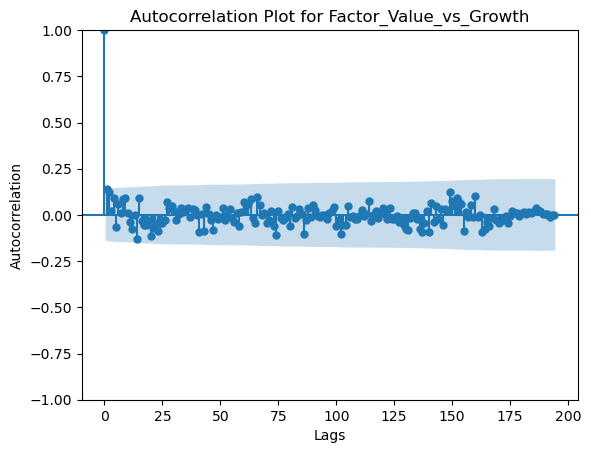

In [32]:
#Plot factors ACF for checking stationarity
plot_acf(df['Factor_Value_vs_Growth'], lags=len(df['Factor_Value_vs_Growth'])-1)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for Factor_Value_vs_Growth')
plt.show()

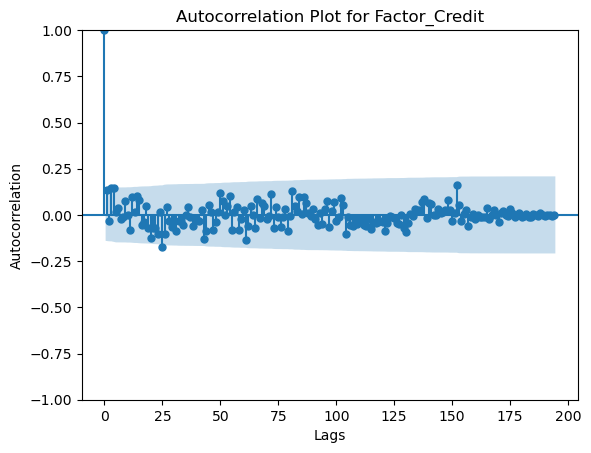

In [33]:
#Plot factors ACF for checking stationarity
plot_acf(df['Factor_Credit'], lags=len(df['Factor_Credit'])-1)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for Factor_Credit')
plt.show()

Visually it is evident that both Betas are stationary given the value of autocorrelation quickly degrades to zero with regards to time. 

From a risk perspective stationarity is a highly sought out criteria as it allows for accurate forecasting of time series data.The reasons are that:
1. Constant mean over time
2. Constant Variance over time
3. Constant autocorrelation over time

This adds to the predictability of the time series and confirms maket efficiency.